In [1]:
from pycocotools.coco import COCO
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys

In [2]:
#读取训练coco数据
coco=COCO( '/data/data/P1-sum-pro/annotations/train.json')
#coco=COCO( '/data/data/P1-sum-pro/annotations/test.json')

loading annotations into memory...
Done (t=9.21s)
creating index...
index created!


## Label转为 以适应fastai
将coco label（32，w,h） 转换为一通道（1，w,h）

In [8]:
count=0
for idx in coco.getImgIds():
    img = coco.loadImgs(idx)[0]
    fns = img['file_name']
    height= img['height']
    width = img['width']
    annIds = coco.getAnnIds(imgIds=idx)
    anns   = coco.loadAnns(annIds)
    segmentation = np.zeros((height, width),dtype=np.uint8)
    for ann_item in anns:
        mask = coco.annToMask(ann_item)
        segmentation[mask>0] = ann_item['category_id']
    im = Image.fromarray(segmentation)
    im.save("/data/code/zcm/train_label/{}_label.png".format(fns[:-4]))
    count+=1
    sys.stdout.write('\r|%s'%(count))
    sys.stdout.flush()

|3248

In [3]:
len(coco.getImgIds())

25209

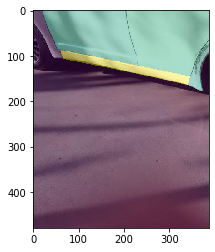

In [100]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('/data/data/P1-sum-pro/images/val/'+img['file_name'])
plt.imshow(image)
plt.imshow(segmentation,alpha=0.4)

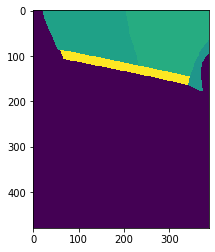

In [101]:
plt.imshow(segmentation)

In [172]:
#查看数据长宽分布
heights=[]
widths =[]
count=0
for idx in coco.getImgIds():
    img = coco.loadImgs(idx)[0]
    height= img['height']
    width = img['width']
    heights.append(height)
    widths.append(width)
    count+=1
    sys.stdout.write('\r|%s'%(count))
    sys.stdout.flush()

|25209

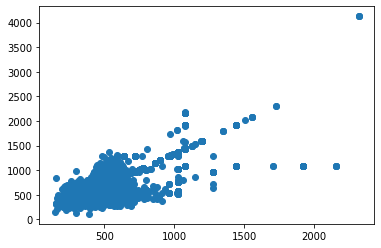

In [179]:
plt.scatter(heights,widths,)

In [180]:
plt.show(heights,widths)